In [1]:
import os
os.chdir('../')

In [21]:
import numpy as np
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from PIL import Image
import torch

# Load the image
depth = torch.load("tmp/depthmap.pt").cpu().numpy()[0]

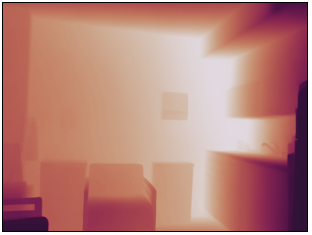

In [58]:
torch.tensor(depth).chans

1111  "array[69312] i64 0.5Mb x∈[-1, 120] μ=23.479 σ=37.546"


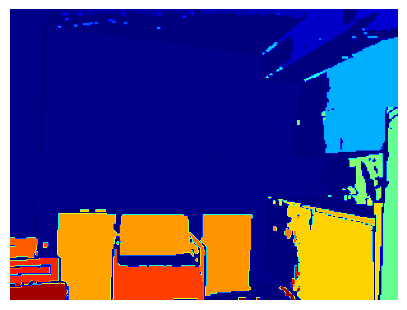

In [99]:
import numpy as np
from sklearn.cluster import DBSCAN

# Assuming depth_map is your [H, W] numpy array containing the depth values

def cluster_depth_map(depth_map, eps=1.5, min_samples=5):
    # Get the height and width of the depth map
    H, W = depth_map.shape
    
    # Create an array of [x, y] coordinates for each pixel
    y, x = np.mgrid[0:H, 0:W]
    
    # Stack the coordinates with the depth map to get a [x, y, depth] feature for each pixel
    features = np.stack((x.ravel(), y.ravel(), depth_map.ravel() * 100), axis=1)
    
    # Apply DBSCAN clustering
    # eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other
    # min_samples: The number of samples in a neighborhood for a point to be considered as a core point
    clustering = DBSCAN(eps=eps, min_samples=min_samples, p=1).fit(features)
    
    # The labels_ attribute will have the cluster labels for each point
    labels = clustering.labels_
    import jhutil; jhutil.jhprint(1111, labels)
    
    # Reshape the labels back to the original depth map shape
    labels_map = labels.reshape(H, W)
    
    return labels_map

labels_map = cluster_depth_map(depth, eps=1.4, min_samples=4)

# Visualize the clustering result
plt.figure(figsize=(5, 5))
plt.imshow(labels_map, cmap='jet')  # Colormap can be adjusted
plt.axis('off')  # Hide the axes
plt.show()


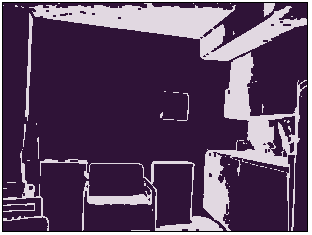

In [105]:
torch_map = torch.tensor(labels_map)
(torch_map == -1).chans